# 该notebook为信用卡交易风险预测本人的建模过程

导入模块和数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


数据预处理和特征工程

Text(0, 0.5, 'Frequency')

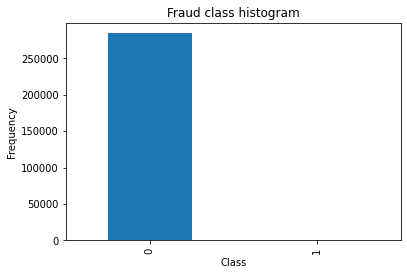

In [2]:
#我们要预测的是信用卡的本次交易是否有风险，先看下目标值的分布
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [3]:
#可见有风险和无风险这两种类别都相差很大，如果直接将该数据集训练可能会导致我们的模型更容易拟合无风险的类别

In [3]:
#该数据集是已经经过处理的数据，但amount类型还没有经过处理，将其标准化，使其对结果的不受数值差距大小的影响
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1) #很明显time特征与我们要预测的结果无关，将其也删去
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [4]:
data.corr()['Class'] #查看各项特征对目标的影响

V1           -0.101347
V2            0.091289
V3           -0.192961
V4            0.133447
V5           -0.094974
V6           -0.043643
V7           -0.187257
V8            0.019875
V9           -0.097733
V10          -0.216883
V11           0.154876
V12          -0.260593
V13          -0.004570
V14          -0.302544
V15          -0.004223
V16          -0.196539
V17          -0.326481
V18          -0.111485
V19           0.034783
V20           0.020090
V21           0.040413
V22           0.000805
V23          -0.002685
V24          -0.007221
V25           0.003308
V26           0.004455
V27           0.017580
V28           0.009536
Class         1.000000
normAmount    0.005632
Name: Class, dtype: float64

<AxesSubplot:ylabel='Class'>

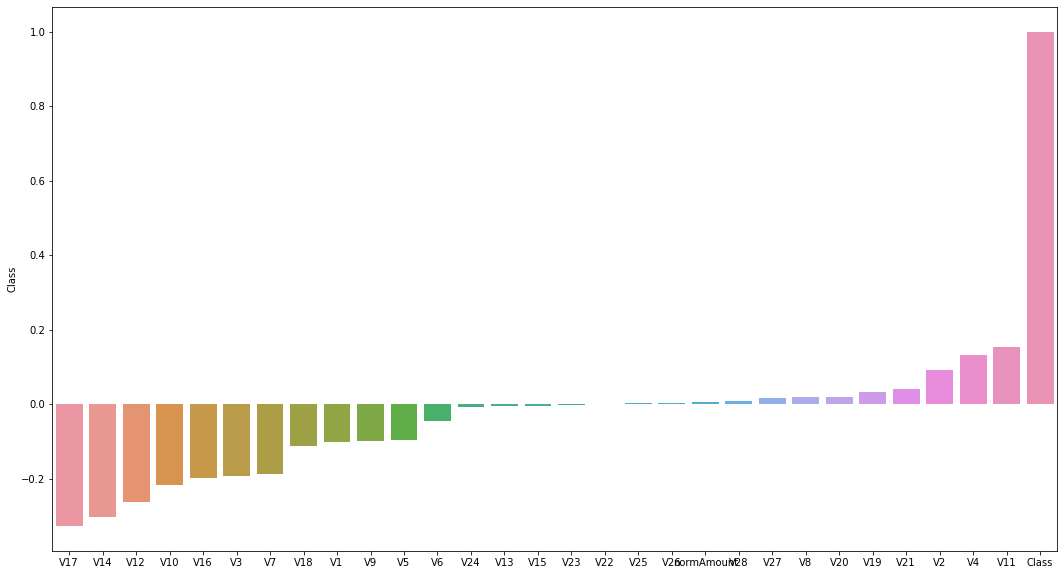

In [5]:
plt.figure(figsize=(18, 10))
sns.barplot(x=data.corr()['Class'].sort_values().index, y=data.corr()['Class'].sort_values())

In [6]:
#可见v24,v13,v15,v23,v22,v25,v26,normAmount,v28这些特征对结果的影响很小，我们将其删去，消除无关变量导致的误差
data = data.drop(['V24', 'V13','V15', 'V23', 'V22', 'V25', 'V26', 'normAmount', 'V28'], axis=1) 

In [7]:
#由于Class类别的数量差距较大，我们需要对其采取过采样或少采样的方法来使模型对有风险和无风险的判断有更高的准确率
import pandas as pd
from imblearn.over_sampling import SMOTE  #对此问题我们使用smote过采样方法，产生大量Class为1的数据使样本达到均衡
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
credit_cards = data
columns=credit_cards.columns
# 将特征数据与目标数据分开
features_columns=columns.delete(len(columns)-1)

features=credit_cards[features_columns]
labels=data['Class']

In [11]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [18]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [22]:
len(os_labels)

454908

In [23]:
len(os_labels[os_labels==1]) #可见样本已经均衡分布

227454

建立模型

In [28]:
import itertools  #定义一个展示混淆矩阵的函数，方便我们观察得到的模型性能
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9306930693069307


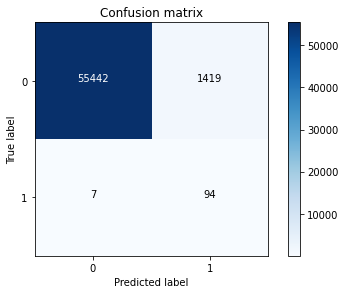

In [38]:
from sklearn.linear_model import LogisticRegression    #使用较为简单的逻辑回归建模
lr = LogisticRegression(penalty = 'l2')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [ ]:
#可见该模型的性能还是不错的